In [1]:
import mlrose_hiive as mlrose

# import mlrose
import numpy as np

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score 
from sklearn.preprocessing import OrdinalEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import svm
from sklearn.neural_network import MLPClassifier
# from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import plot_roc_curve

from pandas import DataFrame


import matplotlib.pyplot as plt

from sklearn.metrics import auc
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import StratifiedKFold

from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV


In [2]:
# Load dataset
#df = pd.read_csv('../input/ucidata/crx.data',header=None)
header_names=['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P']
df = pd.read_csv('../Data/crx.data',names=header_names)

# Inspect data
df.head()

,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,P
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


In [3]:
df = df.replace('?',np.nan)

In [4]:
def fix_missing_ffill(df, col):
    ''' This function takes a data frame as input 
    replaces the missing values of a particular column with the value from the previous row
    '''
    #df[col] = pd.to_numeric(df[col], errors = 'coerce')
    df[col] = df[col].fillna(method='ffill')  
def fix_missing_mean(df,col):
    ''' This function takes a data frame as input 
    replaces the missing values of a particular column with it's mean value
    '''
    #replace missing values with mean 
    df[col] = pd.to_numeric(df[col], errors = 'coerce')
    df[col].fillna(df[col].mean(), inplace = True)    


In [5]:
fix_missing_ffill(df,'A')
fix_missing_ffill(df,'B')
fix_missing_ffill(df,'D')
fix_missing_ffill(df,'E')
fix_missing_ffill(df,'F')
fix_missing_ffill(df,'G')
fix_missing_mean(df,'N')

# Separate target from features
y = df['P']
features = df
features = features.drop(['P'], axis=1)
# Preview features
features.head()

,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202.0,0
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43.0,560
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,280.0,824
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100.0,3
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120.0,0


In [ ]:
y = y.replace('+', 1.0)
y = y.replace('-', 0.0)

In [7]:
# List of categorical columns
object_cols = ['A','B','D','E','F','G','I','J','L','M','N']

# ordinal-encode categorical columns
X = features.copy()
ordinal_encoder = OrdinalEncoder()
X[object_cols] = ordinal_encoder.fit_transform(features[object_cols])

# Preview the ordinal-encoded features
X.head()


,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O
0,1.0,156.0,0.000,1.0,0.0,12.0,7.0,1.25,1.0,1.0,1,0.0,0.0,69.0,0
1,0.0,328.0,4.460,1.0,0.0,10.0,3.0,3.04,1.0,1.0,6,0.0,0.0,11.0,560
2,0.0,89.0,0.500,1.0,0.0,10.0,3.0,1.50,1.0,0.0,0,0.0,0.0,97.0,824
3,1.0,125.0,1.540,1.0,0.0,12.0,7.0,3.75,1.0,1.0,5,1.0,0.0,31.0,3
4,1.0,43.0,5.625,1.0,0.0,12.0,7.0,1.71,1.0,0.0,0,0.0,2.0,37.0,0


In [8]:
xTrain, xTest, yTrain, yTest = train_test_split(X, y,test_size=0.20,random_state=2)

In [9]:
# xTrain_norm = (xTrain-xTrain.min())/(xTrain.max()-xTrain.min())
# xTest_norm = (xTest-xTest.min())/(xTest.max()-xTest.min())

# Normalize feature data
scaler = MinMaxScaler()

xTrain_norm = scaler.fit_transform(xTrain)
xTest_norm = scaler.fit_transform(xTest)

In [58]:
mlp_clf = MLPClassifier(hidden_layer_sizes=(20,28, 20),  max_iter=500, solver='adam', activation='relu', alpha=0.7, 
                 learning_rate_init=0.01, learning_rate='adaptive',  verbose=False, momentum=0.1, random_state=0)
mlp_clf.fit(xTrain_norm, yTrain)
mlp_clf.score(xTest_norm,yTest)
fitness_curve1 = mlp_clf.loss_curve_

In [72]:
# Initialize neural network object and fit object - attempt 1
nn_model1 = mlrose.NeuralNetwork(hidden_nodes = [20, 28, 20], activation ='relu', 
                                 algorithm ='gradient_descent', curve = True,
                                 max_iters = 500, bias = True, is_classifier = True, 
                                 learning_rate = 0.001, early_stopping = True, 
                                 clip_max = 5, max_attempts = 100, random_state = 3)

nn_model1.fit(xTrain_norm, yTrain)

y_train_pred = nn_model1.predict(xTrain_norm)

y_train_accuracy = accuracy_score(yTrain, y_train_pred)

print(y_train_accuracy)

y_test_pred = nn_model1.predict(xTest_norm)

y_test_accuracy = accuracy_score(yTest, y_test_pred)

print(y_test_accuracy)

fitness_curve1 = nn_model1.fitness_curve
# print(type(fitness_curve1))
# fitness_curve1a = fitness_curve1[:, 0]
# fitness_curve1b = fitness_curve1[:, 1]
# plt.plot(range(len(fitness_curve1)), fitness_curve1a)

0.9057971014492754
0.8840579710144928


In [94]:
nn_model2 = mlrose.NeuralNetwork(hidden_nodes = [20, 28, 20], activation ='relu', 
                                 algorithm ='random_hill_climb', curve = True,
                                 max_iters = 1000, bias = True, is_classifier = True, 
                                 learning_rate = 10, early_stopping = True, restarts = 0,
                                 clip_max = 5, max_attempts = 100, random_state = 1)

nn_model2.fit(xTrain_norm, yTrain)

y_train_pred = nn_model2.predict(xTrain_norm)

y_train_accuracy = accuracy_score(yTrain, y_train_pred)

print(y_train_accuracy)

y_test_pred = nn_model2.predict(xTest_norm)

y_test_accuracy = accuracy_score(yTest, y_test_pred)

print(y_test_accuracy)

fitness_curve2 = nn_model2.fitness_curve
fitness_curve2a = fitness_curve2[:, 0]
fitness_curve2b = fitness_curve2[:, 1]
# plt.plot(range(len(fitness_curve2)), fitness_curve2a)

0.8134057971014492
0.8043478260869565


In [92]:
nn_model3 = mlrose.NeuralNetwork(hidden_nodes = [20, 28, 20], activation ='relu', 
                                 algorithm ='simulated_annealing', curve = True,
                                 max_iters = 1000, bias = True, is_classifier = True, 
                                 learning_rate = 0.5, early_stopping = True, restarts = 0,
                                 clip_max = 5, max_attempts = 100, random_state = 1)

nn_model3.fit(xTrain_norm, yTrain)

y_train_pred = nn_model3.predict(xTrain_norm)

y_train_accuracy = accuracy_score(yTrain, y_train_pred)

print(y_train_accuracy)

y_test_pred = nn_model3.predict(xTest_norm)

y_test_accuracy = accuracy_score(yTest, y_test_pred)

print(y_test_accuracy)

fitness_curve3 = nn_model3.fitness_curve
fitness_curve3a = fitness_curve3[:, 0]
fitness_curve3b = fitness_curve3[:, 1]
# plt.plot(range(len(fitness_curve3)), fitness_curve3a)

0.7898550724637681
0.7898550724637681


In [96]:
nn_model4 = mlrose.NeuralNetwork(hidden_nodes = [20, 28, 20], activation ='relu', 
                                 algorithm ='genetic_alg', curve = True,
                                 max_iters = 1000, bias = True, is_classifier = True, 
                                 learning_rate = 0.1, early_stopping = True, restarts = 0,
                                 clip_max = 5, max_attempts = 100, random_state = 1)

nn_model4.fit(xTrain_norm, yTrain)

y_train_pred = nn_model4.predict(xTrain_norm)

y_train_accuracy = accuracy_score(yTrain, y_train_pred)

print(y_train_accuracy)

y_test_pred = nn_model4.predict(xTest_norm)

y_test_accuracy = accuracy_score(yTest, y_test_pred)

print(y_test_accuracy)

fitness_curve4 = nn_model4.fitness_curve
fitness_curve4a = fitness_curve4[:, 0]
fitness_curve4b = fitness_curve4[:, 1]
# plt.plot(range(len(fitness_curve4)), fitness_curve4a)

0.8405797101449275
0.8260869565217391


(0.0, 10.0)

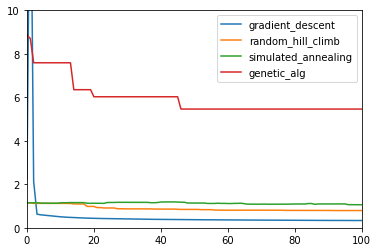

In [97]:
plt.plot(range(len(fitness_curve1)), -fitness_curve1, label='gradient_descent')
plt.plot(range(len(fitness_curve2)), fitness_curve2a, label='random_hill_climb')
plt.plot(range(len(fitness_curve3)), fitness_curve3a, label='simulated_annealing')
plt.plot(range(len(fitness_curve4)), fitness_curve4a, label='genetic_alg')
plt.legend()
plt.xlim([0, 100])
plt.ylim([0, 10])


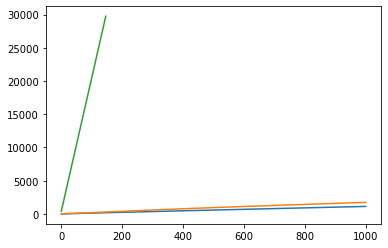

In [98]:
# plt.plot(range(len(fitness_curve1)), fitness_curve1, label='gradient_descent')
plt.plot(range(len(fitness_curve2)), fitness_curve2b, label='random_hill_climb')
plt.plot(range(len(fitness_curve3)), fitness_curve3b, label='simulated_annealing')
plt.plot(range(len(fitness_curve4)), fitness_curve4b, label='genetic_alg')

In [80]:
fitness_curve1[:10]

array([ -2.2158535 , -18.96528973,  -2.13767195,  -0.62767528,
        -0.59936123,  -0.58325239,  -0.56987892,  -0.55372444,
        -0.53553535,  -0.51922106])